# Part 2: Predicting the masses of stars(on a bigger dataset)

## [Expolanet Archive](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html)
#href [column-definitions](https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html)

In [190]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.optimize as opt
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, confusion_matrix
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

import pydotplus
from IPython.display import Image


In [3]:
all_data = requests.get('https://exoplanetarchive.ipac.caltech.edu/TAP/sync?query=select+*+from+ps&format=json')

In [4]:
all_data

<Response [200]>

In [5]:
data = pd.DataFrame(all_data.json())
data

pl_name pl_letter     hostname    hd_name    hip_name  \
0       OGLE-TR-10 b         b   OGLE-TR-10       None        None   
1       BD-08 2823 b         b   BD-08 2823       None   HIP 49067   
2       BD-08 2823 c         c   BD-08 2823       None   HIP 49067   
3          HR 8799 c         c      HR 8799  HD 218396  HIP 114189   
4        HD 104985 b         b    HD 104985  HD 104985   HIP 58952   
...              ...       ...          ...        ...         ...   
35900  Kepler-1988 b         b  Kepler-1988       None        None   
35901  Kepler-1984 b         b  Kepler-1984       None        None   
35902  Kepler-1994 b         b  Kepler-1994       None        None   
35903  Kepler-1979 b         b  Kepler-1979       None        None   
35904  Kepler-1980 b         b  Kepler-1980       None        None   

              tic_id                       gaia_id  default_flag  \
0      TIC 130150682  Gaia DR2 4056443366649948160             1   
1       TIC 33355302  Gaia DR2 3770419611540574080             0   
2       TIC 33355302  Gaia DR2 3770419611540574080             1   
3      TIC 245368902  Gaia DR2 2832463659640297472             1   
4      TIC 160224839  Gaia DR2 1693159194226600192             0   
...              ...                           ...           ...   
35900  TIC 268160366  Gaia DR2 2078996821055736960             0   
35901  TIC 137089954  Gaia DR2 2101508501301083520             0   
35902  TIC 273043474  Gaia DR2 2080271674728481280             0   
35903  TIC 122142813  Gaia DR2 2051368434612892800             0   
35904  TIC 139036617  Gaia DR2 2052139123549626240             0   

                                              pl_refname  \
0      <a refstr=TORRES_ET_AL__2008 href=https://ui.a...   
1      <a refstr=HEBRARD_ET_AL__2010 href=https://ui....   
2      <a refstr=HEBRARD_ET_AL__2010 href=https://ui....   
3      <a refstr=MAROIS_ET_AL__2008 href=https://ui.a...   
4      <a refstr=SATO_ET_AL__2003 href=https://ui.ads...   
...                                                  ...   
35900  <a refstr=HOLCZER_ET_AL__2016 href=https://ui....   
35901  <a refstr=Q1_Q12_KOI_TABLE href=https://exopla...   
35902  <a refstr=Q1_Q8_KOI_TABLE href=https://exoplan...   
35903  <a refstr=Q1_Q17_DR24_KOI_TABLE href=https://e...   
35904  <a refstr=VALIZADEGAN_ET_AL__2023 href=https:/...   

                                              sy_refname  ... sy_jmagerr1  \
0      <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...         NaN   
1      <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.020   
2      <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.020   
3      <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.027   
4      <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.226   
...                                                  ...  ...         ...   
35900  <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.027   
35901  <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.023   
35902  <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.021   
35903  <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.029   
35904  <a refstr=STASSUN_ET_AL__2019 href=https://ui....  ...       0.028   

       sy_jmagerr2           sy_jmagstr sy_hmag sy_hmagerr1 sy_hmagerr2  \
0              NaN               13.692  13.314       0.121      -0.121   
1           -0.020     7.96&plusmn;0.02   7.498       0.047      -0.047   
2           -0.020     7.96&plusmn;0.02   7.498       0.047      -0.047   
3           -0.027   5.383&plusmn;0.027   5.280       0.018      -0.018   
4           -0.226   4.112&plusmn;0.226   3.547       0.194      -0.194   
...            ...                  ...     ...         ...         ...   
35900       -0.027  10.865&plusmn;0.027  10.617       0.036      -0.036   
35901       -0.023  13.465&plusmn;0.023  12.847       0.023      -0.023   
35902       -0.021  10.615&plusmn;

In [20]:
for col in data.columns:
    print (col)

pl_name
pl_letter
hostname
hd_name
hip_name
tic_id
gaia_id
default_flag
pl_refname
sy_refname
disc_pubdate
disc_year
discoverymethod
disc_locale
disc_facility
disc_instrument
disc_telescope
disc_refname
ra
rastr
dec
decstr
glon
glat
elon
elat
pl_orbper
pl_orbpererr1
pl_orbpererr2
pl_orbperlim
pl_orbperstr
pl_orblpererr1
pl_orblper
pl_orblpererr2
pl_orblperlim
pl_orblperstr
pl_orbsmax
pl_orbsmaxerr1
pl_orbsmaxerr2
pl_orbsmaxlim
pl_orbsmaxstr
pl_orbincl
pl_orbinclerr1
pl_orbinclerr2
pl_orbincllim
pl_orbinclstr
pl_orbtper
pl_orbtpererr1
pl_orbtpererr2
pl_orbtperlim
pl_orbtperstr
pl_orbeccen
pl_orbeccenerr1
pl_orbeccenerr2
pl_orbeccenlim
pl_orbeccenstr
pl_eqt
pl_eqterr1
pl_eqterr2
pl_eqtlim
pl_eqtstr
pl_occdep
pl_occdeperr1
pl_occdeperr2
pl_occdeplim
pl_occdepstr
pl_insol
pl_insolerr1
pl_insolerr2
pl_insollim
pl_insolstr
pl_dens
pl_denserr1
pl_denserr2
pl_denslim
pl_densstr
pl_trandep
pl_trandeperr1
pl_trandeperr2
pl_trandeplim
pl_trandepstr
pl_tranmid
pl_tranmiderr1
pl_tranmiderr2
pl_tran

In [99]:
test_data = data[['pl_rade', 'pl_dens', 'pl_eqt', 'pl_name', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'pl_orbper', 'pl_trandur', 'pl_ratdor', 'pl_masse']]
# test_data = data.copy().drop(columns=['pl_rade', 'pl_dens', 'pl_eqt'])
test_data = test_data.dropna(how='any').set_index('pl_name')
test_data

# removed['pl_rade, pl_dens, pl_eqt']

pl_rade  pl_dens  pl_eqt  rv_flag  pul_flag  ptv_flag  tran_flag  \
pl_name                                                                        
HD 23472 d    0.750    7.500   909.0        1         0         0          1   
TOI-3807 b   18.495    0.289  1646.0        1         0         0          1   
TOI-4087 b   13.047    0.570  1458.0        1         0         0          1   
TOI-2818 b   15.278    0.340  1376.0        1         0         0          1   
TOI-3235 b   11.400    0.780   604.0        1         0         0          1   
...             ...      ...     ...      ...       ...       ...        ...   
NGTS-15 b    12.330    0.740  1146.0        1         0         0          1   
NGTS-17 b    13.899    0.500  1457.0        1         0         0          1   
NGTS-16 b    14.572    0.380  1177.0        1         0         0          1   
TOI-532 b     5.820    1.720   867.0        0         0         0          1   
GJ 3929 b     1.090    7.300   568.0        1         0         0          1   

            ast_flag  pl_orbper  pl_trandur  pl_ratdor   pl_masse  
pl_name                                                            
HD 23472 d         0   3.976640      1.9900      13.29    0.55000  
TOI-3807 b         0   2.898973      1.7800       6.14  330.54154  
TOI-4087 b         0   3.177484      2.9842       8.63  232.01474  
TOI-2818 b         0   4.039709      3.8040       8.63  225.65817  
TOI-3235 b         0   2.592618      1.4800      15.75  211.35589  
...              ...        ...         ...        ...        ...  
NGTS-15 b          0   3.276230      2.5040      10.00  238.68913  
NGTS-17 b          0   3.242530      3.3910       6.28  242.82090  
NGTS-16 b          0   4.845320      3.0610       9.29  211.99155  
TOI-532 b          0   2.326651      1.7500      10.49   61.50000  
GJ 3929 b          0   2.616235      1.1900      16.80    1.75000  

[646 rows x 12 columns]

In [100]:
test_data.dtypes

pl_rade       float64
pl_dens       float64
pl_eqt        float64
rv_flag         int64
pul_flag        int64
ptv_flag        int64
tran_flag       int64
ast_flag        int64
pl_orbper     float64
pl_trandur    float64
pl_ratdor     float64
pl_masse      float64
dtype: object

In [101]:
features = test_data.copy().drop(columns = 'pl_masse')
target = test_data['pl_masse']

## Using Decision Trees

In [129]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42, test_size = 0.3)

In [130]:
model = DecisionTreeRegressor(random_state=42)

In [131]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [132]:
y_pred_dt = model.predict(X_test)

In [133]:
mse = mean_squared_error(y_test, y_pred_dt)
mse

26378.404535712634

In [134]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=features.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.794621 to fit



In [135]:
mean_absolute_error(y_test, y_pred_dt)

69.4761587628866

In [136]:
mean_squared_error(y_test, y_pred_dt)

26378.404535712634

In [137]:
r2_score(y_test, y_pred_dt)

0.9361535361423925

In [138]:
explained_variance_score(y_test, y_pred_dt)

0.9378842773210655

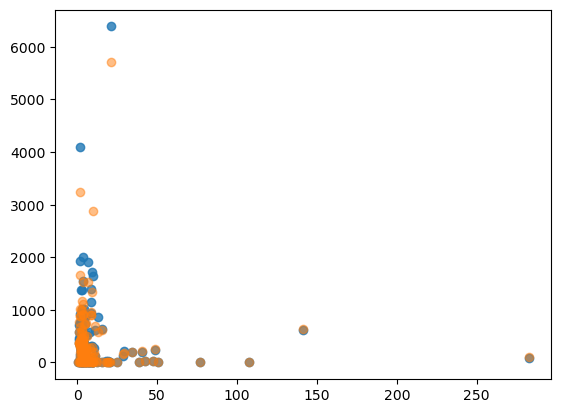

In [139]:
plt.scatter(X_test['pl_orbper'], y_test, alpha = .8)
plt.scatter(X_test['pl_orbper'], y_pred_dt, alpha = .5)

In [140]:
fig = px.scatter(title='Actual vs Predicted using Decision Trees')
fig.add_scatter(x=X_test['pl_orbper'], y=y_test, mode='markers', name='y_test')
fig.add_scatter(x=X_test['pl_orbper'], y=y_pred_dt, mode='markers', name='y_pred', opacity=0.7)

fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text='y_pred')
fig.show()


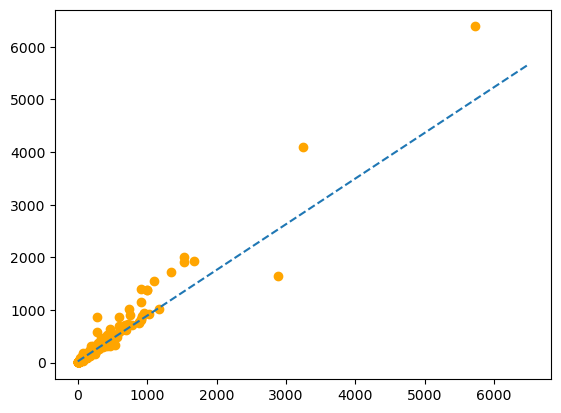

In [181]:
def linear(x, *p):
    return p[0]*x+p[1]

popt, pcov = opt.curve_fit(linear, y_test, y_pred_dt, p0 = (0,0))
popt

x_dt = list(range(0, 6500))
line_dt = [popt[0]*i+popt[1] for i in x]
plt.plot(x_dt, line_dt, '--')
plt.scatter(y_pred_dt, y_test, color = 'orange')

In [182]:
fig = px.scatter(labels={'x': 'y_test', 'y': 'y_pred'}, title='Actual vs Predicted using Decision Trees')
fig.add_scatter(x = y_test, y = y_pred_dt, mode = 'markers', showlegend=False)
fig.add_scatter(x=x_dt, y=line_dt, mode = 'lines', line=dict(dash='dot'), showlegend=False)

fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text='y_pred')
fig.show()

## Random forests

In [156]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [157]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)
rf_model = rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [158]:
mean_absolute_error(y_test, y_pred_rf)

47.64461414422688

In [159]:
mean_squared_error(y_test, y_pred_rf)

22296.492122470343

In [160]:
r2_score(y_test, y_pred_rf)

0.946033423798568

In [161]:
explained_variance_score(y_test, y_pred_rf)

0.9461358410317698

In [162]:
evals = test_data[['pl_rade', 'pl_dens', 'pl_eqt', 'rv_flag', 'pul_flag', 'ptv_flag', 'tran_flag', 'ast_flag', 'pl_orbper', 'pl_trandur', 'pl_ratdor', 'pl_masse']]
evals_mass = evals['pl_masse']
evals_testdf = evals.copy().drop(columns='pl_masse')
evals


pl_rade  pl_dens  pl_eqt  rv_flag  pul_flag  ptv_flag  tran_flag  \
pl_name                                                                        
HD 23472 d    0.750    7.500   909.0        1         0         0          1   
TOI-3807 b   18.495    0.289  1646.0        1         0         0          1   
TOI-4087 b   13.047    0.570  1458.0        1         0         0          1   
TOI-2818 b   15.278    0.340  1376.0        1         0         0          1   
TOI-3235 b   11.400    0.780   604.0        1         0         0          1   
...             ...      ...     ...      ...       ...       ...        ...   
NGTS-15 b    12.330    0.740  1146.0        1         0         0          1   
NGTS-17 b    13.899    0.500  1457.0        1         0         0          1   
NGTS-16 b    14.572    0.380  1177.0        1         0         0          1   
TOI-532 b     5.820    1.720   867.0        0         0         0          1   
GJ 3929 b     1.090    7.300   568.0        1         0         0          1   

            ast_flag  pl_orbper  pl_trandur  pl_ratdor   pl_masse  
pl_name                                                            
HD 23472 d         0   3.976640      1.9900      13.29    0.55000  
TOI-3807 b         0   2.898973      1.7800       6.14  330.54154  
TOI-4087 b         0   3.177484      2.9842       8.63  232.01474  
TOI-2818 b         0   4.039709      3.8040       8.63  225.65817  
TOI-3235 b         0   2.592618      1.4800      15.75  211.35589  
...              ...        ...         ...        ...        ...  
NGTS-15 b          0   3.276230      2.5040      10.00  238.68913  
NGTS-17 b          0   3.242530      3.3910       6.28  242.82090  
NGTS-16 b          0   4.845320      3.0610       9.29  211.99155  
TOI-532 b          0   2.326651      1.7500      10.49   61.50000  
GJ 3929 b          0   2.616235      1.1900      16.80    1.75000  

[646 rows x 12 columns]

In [163]:
evals_mass

pl_name
HD 23472 d      0.55000
TOI-3807 b    330.54154
TOI-4087 b    232.01474
TOI-2818 b    225.65817
TOI-3235 b    211.35589
                ...    
NGTS-15 b     238.68913
NGTS-17 b     242.82090
NGTS-16 b     211.99155
TOI-532 b      61.50000
GJ 3929 b       1.75000
Name: pl_masse, Length: 646, dtype: float64

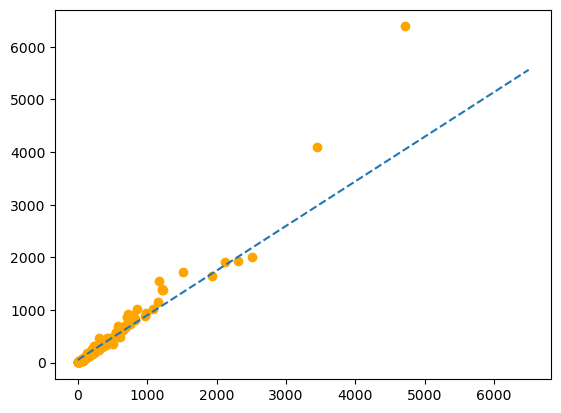

In [183]:
def linear(x, *p):
    return p[0]*x+p[1]

popt, pcov = opt.curve_fit(linear, y_test, y_pred_rf, p0 = (0,0))
popt

x_rf = list(range(0, 6500))
line_rf = [popt[0]*i+popt[1] for i in x]
plt.plot(x_rf, line_rf, '--')
plt.scatter(y_pred_rf, y_test, color = 'orange')

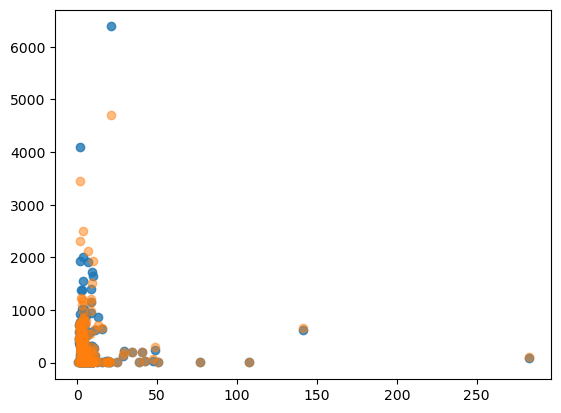

In [165]:
plt.scatter(X_test['pl_orbper'], y_test, alpha = .8)
plt.scatter(X_test['pl_orbper'], y_pred_rf, alpha = .5)

In [184]:
fig = px.scatter(labels={'x': 'y_test', 'y': 'y_pred'}, title='Actual vs Predicted using Random Forests')
fig.add_scatter(x = y_test, y = y_pred_rf, mode = 'markers', showlegend=False)
fig.add_scatter(x=x_rf, y=line_rf, mode = 'lines', line=dict(dash='dot'), showlegend=False)

fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text='y_pred')
fig.show()

In [167]:
fig = px.scatter(title='Actual vs Predicted')
fig.add_scatter(x=X_test['pl_orbper'], y=y_test, mode='markers', name='y_test')
fig.add_scatter(x=X_test['pl_orbper'], y=y_pred_rf, mode='markers', name='y_pred', opacity=0.7)

fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text='y_pred')
fig.show()

In [168]:
np.median(np.abs(y_test-y_pred_rf))

12.40265981000067

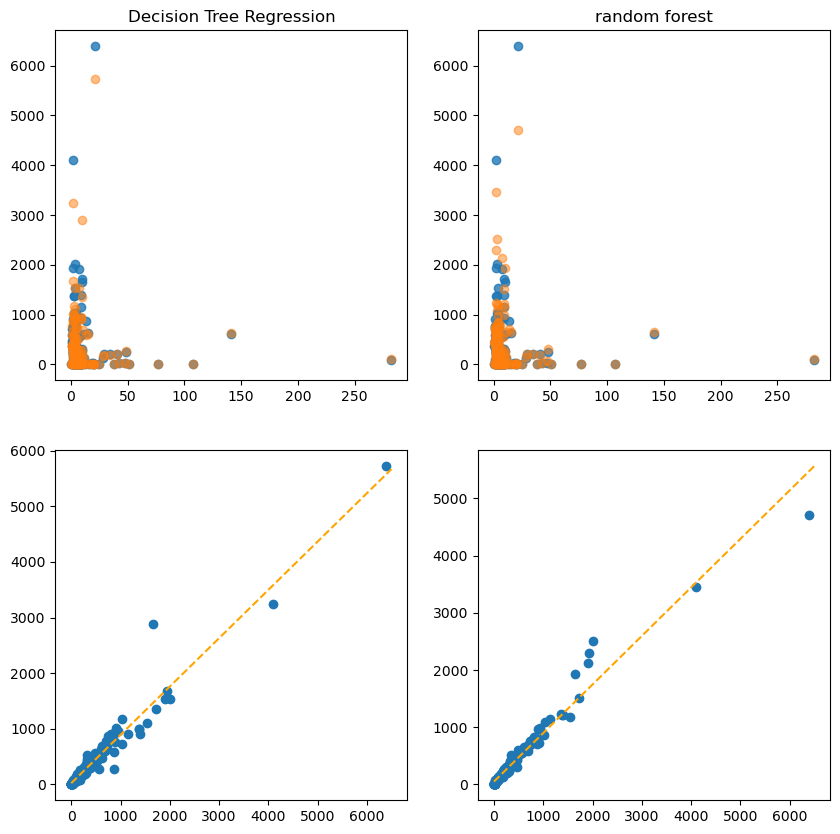

In [188]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)

fig.set_figheight(10)
fig.set_figwidth(10)

axes[0,0].set_title('Decision Tree Regression')
axes[0,0].scatter(X_test['pl_orbper'], y_test, alpha = .8)
axes[0,0].scatter(X_test['pl_orbper'], y_pred_dt, alpha = .5)

axes[1,0].scatter(y_test, y_pred_dt)
axes[1,0].plot(x_dt, line_dt, '--', color = 'orange')

axes[0,1].scatter(X_test['pl_orbper'], y_test, alpha = .8)
axes[0,1].scatter(X_test['pl_orbper'], y_pred_rf, alpha = .5)
axes[0,1].set_title('random forest')

axes[1,1].plot(x_rf, line_rf, '--', color = 'orange')
axes[1,1].scatter(y_test, y_pred_rf)


In [191]:
fig = make_subplots(
    rows=2, cols=2,
    column_widths=[0.6, 0.4],
    row_heights=[0.4, 0.6])

In [198]:
# fig = px.scatter(labels={'x': 'y_test', 'y': 'y_pred'}, title='Actual vs Predicted using Random Forests')
# fig.add_scatter(x = y_test, y = y_pred_rf, mode = 'markers', showlegend=False)
# fig.add_scatter(x=x_rf, y=line_rf, mode = 'lines', line=dict(dash='dot'), showlegend=False)

# fig.update_xaxes(title_text='y_test')
# fig.update_yaxes(title_text='y_pred')
# fig.show()

fig = px.scatter(title='Actual vs Predicted')
fig.add_scatter(x=X_test['pl_orbper'], y=y_test, mode='markers', name='y_test')
fig.add_scatter(x=X_test['pl_orbper'], y=y_pred_rf, mode='markers', name='y_pred', opacity=0.7)

fig.update_xaxes(title_text='y_test')
fig.update_yaxes(title_text='y_pred')
fig.show()

In [204]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# Original scatter plot with labels
fig1 = px.scatter(labels={'x': 'y_test', 'y': 'y_pred'}, title='Actual vs Predicted using Random Forests')
fig1.add_scatter(x=y_test, y=y_pred_rf, mode='markers', showlegend=False)
fig1.add_scatter(x=x_rf, y=line_rf, mode='lines', line=dict(dash='dot'), showlegend=False)
fig1.update_xaxes(title_text='y_test')
fig1.update_yaxes(title_text='y_pred')

# Scatter plot without labels
fig2 = px.scatter(title='Actual vs Predicted')
fig2.add_scatter(x=X_test['pl_orbper'], y=y_test, mode='markers', name='y_test', opacity=0.4, marker=dict(color='blue'))
fig2.add_scatter(x=X_test['pl_orbper'], y=y_pred_rf, mode='markers', name='y_pred', opacity=0.4, marker=dict(color='orange'))
fig2.update_xaxes(title_text='y_test')
fig2.update_yaxes(title_text='y_pred')

# Combine plots into subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=("Using Random Forests", "Original"))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1)
fig.add_trace(fig1.data[2], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig2.data[1], row=1, col=2)

fig.update_layout(title="Comparison of Actual vs Predicted", showlegend=False)

fig.show()
